In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('V:\\ML Internship\\DATA\\Classification Assignment - Loan_Application.csv')

In [3]:
dataset

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


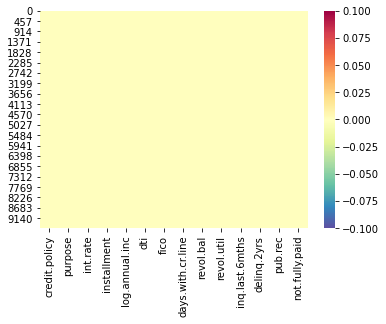

In [5]:
import seaborn as sns
sns.heatmap(dataset.isnull(), cmap='Spectral_r')

In [6]:
purp = pd.get_dummies(dataset['purpose'], drop_first=True)

In [7]:
purp

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
9573,0,0,0,0,0,0
9574,0,0,0,0,0,0
9575,0,1,0,0,0,0
9576,0,0,0,1,0,0


In [8]:
dataset.drop(['purpose'], axis = 1, inplace = True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7)
memory usage: 972.9 KB


In [10]:
dataset = pd.concat([dataset,purp], axis = 1)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   int.rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log.annual.inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days.with.cr.line   9578 non-null   float64
 7   revol.bal           9578 non-null   int64  
 8   revol.util          9578 non-null   float64
 9   inq.last.6mths      9578 non-null   int64  
 10  delinq.2yrs         9578 non-null   int64  
 11  pub.rec             9578 non-null   int64  
 12  not.fully.paid      9578 non-null   int64  
 13  credit_card         9578 non-null   uint8  
 14  debt_consolidation  9578 non-null   uint8  
 15  educational         9578 non-null   uint8  
 16  home_i

In [12]:
dataset.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = dataset.drop('not.fully.paid', axis = 1)
y = dataset['not.fully.paid']

In [15]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not.fully.paid, Length: 9578, dtype: int64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [22]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
cf = confusion_matrix(y_test, y_pred)
print(cf)

[[2377   20]
 [ 468    9]]


In [26]:
accuracy_score(y_test, y_pred)

0.8302018093249826